In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

In [64]:
mat = loadmat("ex8data1.mat")
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

Text(0, 0.5, 'Throughput (mb/s)')

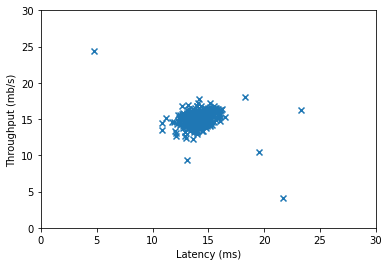

In [65]:
plt.scatter(X[:,0],X[:,1], marker='x')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

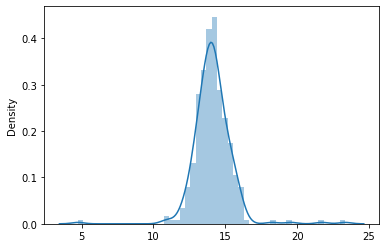

In [66]:
sns.distplot(X[:,0])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

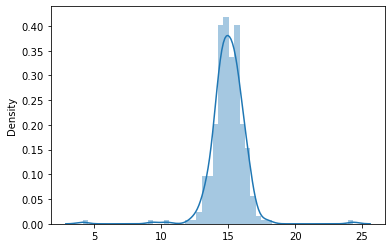

In [67]:
sns.distplot(X[:,1])

In [68]:
#Gaussian Distribution

def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m * sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu) ** 2, axis=0)
    
    return mu, var

In [69]:
mu, sigma = estimateGaussian(X)

In [71]:
def multivariateGaussian(X, mu, sigma):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma = np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5 * np.sum(X @ np.linalg.pinv(sigma) * X, axis=1))
    return p

In [72]:
p = multivariateGaussian(X, mu, sigma)

In [73]:
def GaussianVisualize():
    plt.figure(figsize = (8,6))
    X1,X2 = np.meshgrid(np.arange(0,35.5,0.5),np.arange(0,35.5,0.5))
    p2 = multivariateGaussian(np.stack([X1.ravel(),X2.ravel()],axis = 1),mu,sigma)
    p2 =p2.reshape(X1.shape)
    plt.plot(X[:,0],X[:,1],'bx',mec ='b')
    plt.contour(X1,X2,p2,levels = 10**(np.arange(-20.,1,3)),zorder = 100 )

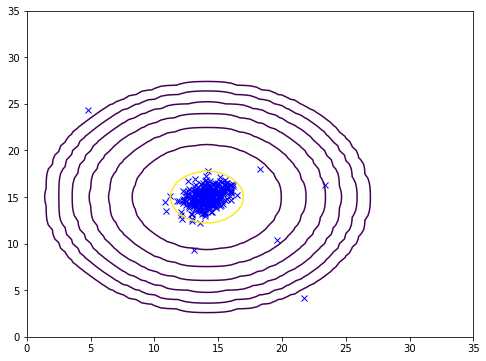

In [74]:
GaussianVisualize()

In [75]:
#Selecting the threshold for Anomaly detection

def select_threshold(pval, yval):
    best_epi = 0
    best_f1 = 0
    step_size = (max(pval)-min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(), step_size)
    for epi in epi_range:
        prediction = (pval<epi)[:, np.newaxis]
        true_positive = np.sum(prediction[yval==1]==1)
        false_positive = np.sum(prediction[yval==0]==1)
        false_negative = np.sum(prediction[yval==1]==0)
        
        precision = true_positive/(true_positive+false_positive)
        recall = true_positive/(true_positive+false_negative)
        
        fscore = (2*precision*recall)/(precision+recall)
        
        if fscore>best_f1:
            best_f1=fscore
            best_epi = epi
            
    return best_f1, best_epi

In [76]:
mu, sigma = estimateGaussian(X)
pval = multivariateGaussian(Xval, mu, sigma)
f1, epsilon = select_threshold(pval, yval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",f1)

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001


<ipython-input-75-400aee6b92b2>:14: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive/(true_positive+false_positive)


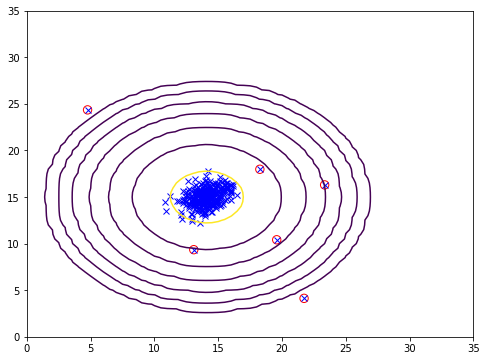

In [78]:
GaussianVisualize()
outliers = np.nonzero(p<epsilon)
plt.scatter(X[outliers,0],X[outliers,1],marker = 'o',facecolor = 'none',edgecolor ="r",s=70)
plt.show()